In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [351]:
#Inicialização dos cromossomos
#0 - 5
cromoT = []
populacao = 10
genes = 4
for i in range(populacao):
    cromo = []
    for j in range(genes):
        cromo.append(round(random.uniform(1,5),3))
    
    cromoT.append(cromo)
    
print(cromoT)

[[4.43, 3.088, 4.195, 4.564], [4.514, 4.509, 3.292, 1.805], [3.09, 3.489, 4.061, 4.272], [4.019, 3.942, 2.639, 1.05], [2.223, 1.166, 2.403, 3.33], [2.872, 2.687, 3.921, 1.828], [4.924, 3.663, 2.4, 2.766], [3.146, 4.025, 2.17, 4.228], [3.548, 2.987, 1.599, 4.797], [4.56, 1.617, 4.352, 2.495]]


In [352]:
#Função objetivo
max_pontos = 100
def obj(cr):
    result = []
    for cromos in cr:
        
        a = cromos[0]
        b = cromos[1]
        c = cromos[2]
        d = cromos[3]
        
        #Equação de bernoulli
        res = (pow(a,2)/2) + (b/c) + 9.8 * d
        
        if res > max_pontos:
            res = max_pontos - (res - max_pontos)
        
        #print(res)
        res = round(res, 3)
        result.append(res)
        
    return result

obj(cromoT)

[55.276, 29.247, 47.499, 19.86, 35.59, 22.724, 40.756, 48.238, 55.173, 35.219]

In [353]:
#Ordenar pontos e cromossomos
def ordena (pontos, cromo):
    zipped = zip(pontos, cromo)

    ordenados = sorted(zipped)

    pontos_ord = []
    cromo_ord = []
    for p, c in ordenados:

        pontos_ord.append(p)
        cromo_ord.append(c)
        
    return pontos_ord, cromo_ord

In [354]:
#Deletando valores com pontuações abaixo do índice
def limiar (pontos_ordenados, cromo_ordenados, taxa):
    #Último ponto abaixo do índice
    limiar = max_pontos * taxa
    ultimo = -1
    for p in range(len(pontos_ordenados)):
        if pontos_ordenados[p] < limiar:
            ultimo = p
        else:
            break;
            
    #Se nenhum for maior que o limiar manter 20 % dos maiores
    if ultimo == (len(pontos_ordenados)-1):
        limite_superior = int(len(pontos_ordenados)*0.8)
        del pontos_ordenados[0:limite_superior]
        del cromo_ordenados[0:limite_superior]  
        
    #deletando valores abaixo do limiar
    elif ultimo > -1: #Ao menos 1 valor abaixo do limiar
        del pontos_ordenados[0:ultimo+1]
        del cromo_ordenados[0:ultimo+1]  
        
    return pontos_ordenados, cromo_ordenados

In [360]:
#Fazendo cruzamentos

def crossover(cromo_, pesos, pop):
    population = pop
    nova_geracao = []
    for c in range (population):

        pai = random.choices(cromo_, weights=pesos)[0]
        id_pai = cromo_.index(pai)
        
        #Se houver mais de 1 cromossomo para a reprodução os pais devem ser diferentes
        if len(cromo_) > 1:
            cromo_.pop(id_pai)
            pesos.pop(id_pai)
            
        mae = random.choices(cromo_, weights=pesos)[0]

        filho = []
        for gene in range(len(pai)):
            gp = pai[gene]
            gm = mae[gene]
            gf = random.choice([gp, gm])

            #Adicionando mutação
            gf = round(gf * random.uniform(0.7, 1.3), 3)
            
            #delimitando genes do filho entre 1 - 10
            if gf > 10:
                gf = 10
                
            elif gf<1:
                gf = 1

            filho.append(gf)

        #print("Filho:",filho)
        nova_geracao.append(filho)
        
    return nova_geracao

In [361]:
def stop(cromo_parar):
    
    pontos_parar = 90#pontuação máxima
    
    #maior ponto
    max_ponto = max(obj(cromo_parar))
    
    if max_ponto >= pontos_parar:
        return True
    else:
        return False

In [362]:
geracoes = 10
# Tamanho da população
pop = 10
final_pont_max = []

def evolucao(cromo, geracoes =100):
    parar = False
    max_pontos = 100
    taxa = 0.4
    for ger in range(geracoes):
        #Calculando pontuação
        print("GERAÇÃO: ",ger)
        print("Cromossomos: ",cromo)
        pontos = obj(cromo)
        print("Pontuações: ", pontos)

        final_pont_max.append(max(pontos))

        #Atualizando cromossomo vencedor
        pontos_max = max(pontos)
        id_max = pontos.index(pontos_max)
        vencedor = cromo[id_max]

        #Organizar listas de acordo com a pontuação
        pontos_ord, cromo_ord = ordena(pontos, cromo)

        #deletando valores abaixo do limiar
        if taxa <=0.8:
            taxa = taxa + 0.05

        #print(taxa)
        ponto_cut, cromo_cut = limiar(pontos_ord, cromo_ord, taxa)

        #Guardando 20% dos melhores para, além de serem pais, serem utilizados na nova geração
        master = cromo_cut[math.floor(len(cromo_cut)*0.8):]

        #Definindo pesos para os cromossomos
        pesos = [i/max_pontos for i in ponto_cut]

        #Crossover
        geracao = crossover(cromo_cut, pesos, pop)

        #Adicionando melhores da geração anterior
        for m in master:
            geracao.append(m)
            print(m)

        cromo = geracao
        print("--------")
        parar = stop(cromo)
        if parar:
            #Calculando pontuação
            print("GERAÇÃO: ",(ger+1))
            print("Cromossomos: ",cromo)
            pontos = obj(cromo)
            print("Pontuações: ", pontos)

            final_pont_max.append(max(pontos))

            #Atualizando cromossomo vencedor
            pontos_max = max(pontos)
            id_max = pontos.index(pontos_max)
            vencedor = cromo[id_max]
            break;
        print("Não parou")
    
    print("Melhor pontuação: ", pontos_max)
    print("Melhor cromossomo: ", vencedor)
    print("Numero de gerações: ", (ger+1))

In [363]:
evolucao(cromoT)

GERAÇÃO:  0
Cromossomos:  [[4.43, 3.088, 4.195, 4.564], [4.514, 4.509, 3.292, 1.805], [3.09, 3.489, 4.061, 4.272], [4.019, 3.942, 2.639, 1.05], [2.223, 1.166, 2.403, 3.33], [2.872, 2.687, 3.921, 1.828], [4.924, 3.663, 2.4, 2.766], [3.146, 4.025, 2.17, 4.228], [3.548, 2.987, 1.599, 4.797], [4.56, 1.617, 4.352, 2.495]]
Pontuações:  [55.276, 29.247, 47.499, 19.86, 35.59, 22.724, 40.756, 48.238, 55.173, 35.219]
[4.43, 3.088, 4.195, 4.564]
--------
Não parou
GERAÇÃO:  1
Cromossomos:  [[3.138, 2.516, 3.07, 4.608], [3.585, 4.474, 2.315, 3.471], [2.912, 3.32, 2.057, 5.349], [4.292, 3.467, 1.998, 3.399], [2.85, 2.64, 1.564, 4.037], [4.007, 2.945, 1.294, 3.769], [2.739, 3.665, 1.12, 3.517], [4.459, 2.88, 1.397, 4.198], [3.709, 2.822, 1.842, 3.649], [2.537, 3.023, 1.572, 3.746], [4.43, 3.088, 4.195, 4.564]]
Pontuações:  [50.901, 42.375, 58.274, 44.256, 45.312, 47.24, 41.49, 53.143, 44.171, 41.852, 55.276]
[2.912, 3.32, 2.057, 5.349]
--------
Não parou
GERAÇÃO:  2
Cromossomos:  [[3.139, 3.005, 2.4

### Plotando resultados

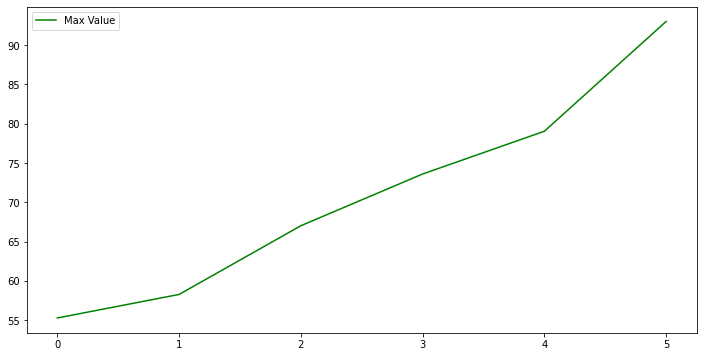

In [364]:
plt.figure(figsize = (12,6))
plt.plot(final_pont_max, color = 'green', label = 'Max Value')

plt.legend()
plt.show()

In [347]:
round(3.129, 2)

3.13